# Prediction using Supervised Learning.

Predicting the Exam score of an student based on the number of study hours.

Hours - Independent Variable     

Score - Dependent Variable which depends on Hours

# Importing Required Libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
df = pd.read_csv('student_scores.csv')
print("The Shape is: ",df.shape) #Shape of the dataset i.e total rows and columns
df.head()                        

The Shape is:  (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [71]:
df.columns                       #columns will give the column Names 

Index(['Hours', 'Scores'], dtype='object')

In [72]:
df.describe()                    #Gives the statistical summary

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualizing the data using Matplotlib-Scatterplot

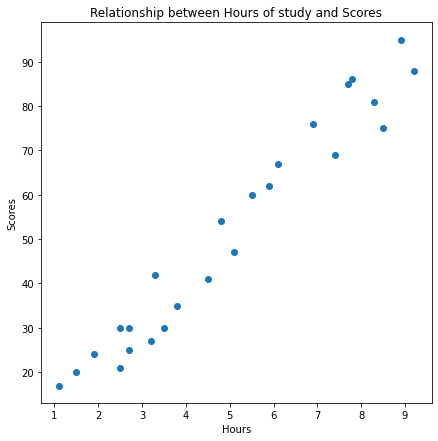

In [73]:
fig =plt.figure(figsize=(7,7))
plt.scatter(x=df['Hours'],y=df['Scores'])
plt.title('Relationship between Hours of study and Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# In this section we will see

#importing Linear Regression Model.
#Dividing a data for Training and Testing
#Evaluate a score by cross-validation

In [74]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['Hours']],df['Scores'],test_size = 0.2)

In [76]:
 x_train.shape, y_train.shape

((20, 1), (20,))

In [77]:
x_test.shape, y_test.shape


((5, 1), (5,))

In [78]:
from sklearn.model_selection import KFold,cross_val_score
fold = KFold(n_splits=5,random_state=0, shuffle=True)
scores = cross_val_score(model, x_train, y_train,scoring='r2', cv=fold)
scores.mean()

0.9427714007426695

In [79]:
model=model.fit(x_train,y_train)

# Predicted Result

In [80]:
Predicted_result=model.predict(x_test)
Predicted_result

array([28.63483368, 86.02130425, 78.105929  , 26.65598987, 56.33864706])

# Mean Absolute Error 

 #The sum of absolute differences between our target and predicted variables

In [81]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,Predicted_result)

5.711114401342414

# Best Fit Line Using Straight line Formula

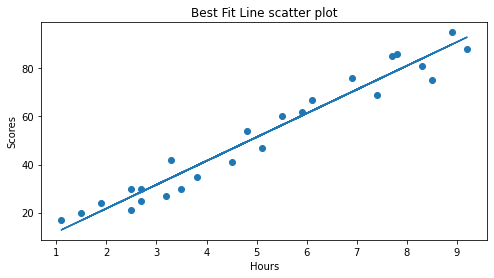

In [82]:
y=model.coef_*df[['Hours']]+model.intercept_   #Y=mx+c
figure = plt.figure(figsize=(8,4))
plt.scatter(df['Hours'],df['Scores'])
plt.plot(df['Hours'],y)                       #plotting Best fit Line whereas Y is straight line
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title("Best Fit Line scatter plot")
plt.show()

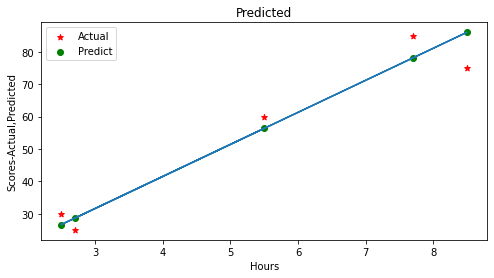

In [83]:
plt.figure(figsize=(8,4))
plt.scatter(x_test,y_test,c='red',marker='*',label='Actual')      #Scatter plot using Test Data(x and y)
plt.scatter(x_test,Predicted_result,c='green',label='Predict')    #Scatter plot using Data(x and predicted_result)
plt.plot(x_test,Predicted_result)                                 #plotting the Line(x and predicted_result)
plt.xlabel('Hours')
plt.ylabel('Scores-Actual,Predicted')
plt.title('Predicted')
plt.legend()

# Predicting the Score for Studying 9.25Hours per day 

In [85]:
print("Student studied 9.25Hours per day will get {} Score".format(model.predict(np.array(9.25).reshape(1,1))))

Student studied 9.25Hours per day will get [93.44196855] Score
